# Analysis of the performance of students of Ultra-Brain Science Academy in 2024 JAMB Exam
By Valentine Ezenwanne

## Abstract

Admission into higher education institutions in Nigeria requires students to write and pass the **Joint Admission Matriculation Examination (JAMB)**. This exam consists of questions on the English subject plus three additional subjects of choice, depending on the course the student applied for. In the case of science students, they had to choose among Mathematics, Physics, Biology, and Chemistry. 

The Academy had **56** students in total, **40 females** and **16 males**; two of the female students were married, while the rest were single. **18%** of the students worked and attended classes, and **41%** resided far away from the academy. A total of **32** students had previously sat the exam in the year 2023, whereas **24** students wrote for the first time in 2024. **52%** of the students applied for Nursing and **79%** of them choose **Nnamdi Azikiwe University (Unizik)** as their first choice

The 2024 students' JAMB scores had the same mean and median of **213** with a standard deviation of **31.79**. The highest and lowest scores are **290** and **146**, respectively. Analysis showed that **14%** of the students scored **above 250**, **55%** scored between **200 and 249**, and **30%** scored **less than 200**.

The analysis of the performance of students who wrote in both 2023 and 2024 yielded an average score of **205** in year 2023 and **221** in year 2024. The boxplot revealed that more over **80%** of students scored **above 200**, whereas in the previous year 2023, less than **50%** passed the 200 mark.

A paired sample t-test with an alpha level of 0.05 was used to further examine whether students' performance in 2024 was better than that in 2023. The p-value **(0.00093)** obtained is less than the **0.05** significance level, thus we **reject** the null hypothesis that the mean in 2023 and 2024 are the same. Thus, at the **5%** significance level, the data provide strong evidence to suggest that the students' JAMB score increased after months of tutoring and that the students performed better in 2024.

The performance of male students was compared to that of female students, the mean score (216.3 vs. 212.1) showed that male had a higher mean score, but the standard deviation (39.85 vs. 28.44) showed male scores were more spread out from the mean. The interquartile range value (64.5 vs. 35.75) confirms the variability in male scores. This demonstrated that female students did better than male students on the exam.

An examination of the impact of tutoring time on performance revealed that students who received three months of tutoring had a mean score of **220.38** and a standard deviation of 32.21, which is higher than those who had two months **(201.09)** or one month **(203.38)**. This suggests that the longer the tutoring period, the better the students’ exam results.

Analysis of the amount of time, the student spent reading each day revealed that students who invested three hours reading every day in preparation for the exam did better, with a mean score of **212.34**, a low standard deviation of 26.52, and an IQR of 32 that indicated reduced variability in the middle 50% of the data 

Analysis of features that may have impacted the performance of the students is required but the sample size is small and machine learning algorithm requires a large sample size inorder to learn and predict the students performance. Therefore, further analysis is recommended with large dataset.

## Objective

- To analyze the performance of Ultra-Brain Students in the JAMB 2024 exam
- To evaluate factors that contributed to the performance of the students

## Analysis Questions
- Question 1: What is the highest and lowest score in 2024 JAMB
- Question 2: What are the top five scores and least five scores
- Question 3: What percentage scored below 200, 200-249, 250 and above
- Question 4: What is the total revenue generated by month?
- Question 5: What is the performance of student in 2024 compared to 2023?
- Question 6: Did the student performance in 2024 better than 2023 performance?
- Question 7: Did the Female students perform better than Male in 2024 JAMB?
- Question 8: Did the student living CLOSE perform better than those living FAR?
- Question 9: What is the performance of student based on their WORK STATUS?
- Question 10: What is the performance of the students based on duration of tutoring?
- Question 11: What is the performance of the students based on Hours Read?

## Dataset

### Data Collection

- The data was collected by means of questionaire. The students were sent a questionaire to answer some questions and the information collected was inputed into an Excel worksheet

### Feature Description

- **Student ID:** This is a unique id given to the students when they registered
- **Student Name:** This is the full name of the student
- **Marital Status:** This indicate if the student is married or single (YES: Married, No: Not Married)
- **Gender:** This indicate the gender of the student (F: Female, M: Male)
- **Year 2023:** This is the score of the student in JAMB in the previous year 2023.
- **Year 2024:** This is the score of the studentin JAMB in the current year 2024
- **English:** This is the score of the student in the English subject
- **Chemistry:** This is the score of the student in the Chemistry subject
- **Physics:** This is the score of the student in the Physics subject
- **Biology/Maths:** This is the score of the student either in Maths or Biology subject
- **Total:** This is the total score of the four subjects
- **Date of Birth:** is the date of birth of the students
- **Course Registered:** This is the course that the student applied as their first choice
- **School Registered:** This is the university or college that the student applied for as their first choice
- **Date Registered:** This is the date that the student registered for tutoring at the academy
- **Date Stopped:** This is the date that the tutoring of the student stopped
- **Lesson Fee:** This is the amount that the student payed each month for the tutoring
- **Work Status:** This indicates if the student work and attend lessons (YES: work, NO: Don't Work)
- **Hours Read:** This is the number of hours the student per day
- **Read Past Question:** This indicates if the student prepared for the exam using past questions
- **Teaching Satisfaction:** This indicate the student's level of satisfaction with the tutoring (1: Very Dissatisfied, 2: Dissatisfied, 3: Neutral, 4: Satisfied, 5: Very Satisfied)
- **Finished on time:** This indicates if the student finished the exam on time
- **System Off:** This indicates if the student computer went off during the exam
- **Questions Different:** This indicates if the questions were different from the syllabus
- **Pay Yourself:** This indicates if the student payed for the lesson by themselves
- **Close Proximity to center:** This indicate if the student lives close to the academy or far

### Load the Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

### Import the data

In [2]:
#load the data
data = pd.read_excel('Jamb Score for UltraBrain Students.xlsx')

In [3]:
#display few lines of the data
data.head(2)

,Student ID,Student Name,Martial Status,Gender,Year 2023,Year 2024,English,Chemistry,Physics,Biology/Maths,Total,Date of Birth,Course registered,School registered,Date Registered,Date Stopped,Lesson Fee,Work Status,Hours read,Read Past Questions,Teaching Satisfaction,Finished on time,System off,Questions different,Pay yourself,Close Proximity to center
0,UB2024001,Chinelo Nneto,Single,F,171.0,217,49,67,53,48,217,2006-01-14,Pharmacy,Unizik,2024-01-09,2024-04-19,13000,No,5,Yes,5,No,No,No,no,yes
1,UB2024002,Mmesoma Ofodile,Single,F,192.0,230,54,59,60,57,230,2007-08-12,Nursing,UNN,2024-01-10,2024-04-19,15000,No,4,Yes,5,Yes,No,No,no,yes


In [4]:
#Understanding the shape of the data
data.shape

(56, 26)

- Data contain 56 students record and 26 column

In [5]:
#checking for missing values
data.isna().sum()

Student ID                    0
Student Name                  0
Martial Status                0
Gender                        0
Year 2023                    24
Year 2024                     0
English                       0
Chemistry                     0
Physics                       0
Biology/Maths                 0
Total                         0
Date of Birth                 0
Course registered             0
School registered             0
Date Registered               0
Date Stopped                  0
Lesson Fee                    0
Work Status                   0
Hours  read                   0
Read Past Questions           0
Teaching Satisfaction         0
Finished on time              0
System off                    0
Questions different           0
Pay yourself                  0
Close Proximity to center     0
dtype: int64

- There are 24 missing values in Year 2023 column

In [6]:
#checking for duplicates
data.duplicated().sum()

0

- There are no duplicates

In [7]:
#checking for datatypes
data.dtypes

Student ID                           object
Student Name                         object
Martial Status                       object
Gender                               object
Year 2023                           float64
Year 2024                             int64
English                               int64
Chemistry                             int64
Physics                               int64
Biology/Maths                         int64
Total                                 int64
Date of Birth                datetime64[ns]
Course registered                    object
School registered                    object
Date Registered              datetime64[ns]
Date Stopped                 datetime64[ns]
Lesson Fee                            int64
Work Status                          object
Hours  read                           int64
Read Past Questions                  object
Teaching Satisfaction                 int64
Finished on time                     object
System off                      

- The data consists of string, integer, float and date datatypes

## Data Wrangling

In [8]:
#create a copy of the dataframe
df = data.copy()

In [9]:
#checking column names
df.columns

Index(['Student ID', 'Student Name', 'Martial Status', 'Gender', 'Year 2023',
       'Year 2024', 'English', 'Chemistry', 'Physics', 'Biology/Maths',
       'Total', 'Date of Birth', 'Course registered', 'School registered',
       'Date Registered', 'Date Stopped', 'Lesson Fee', 'Work Status',
       'Hours  read', 'Read Past Questions', 'Teaching Satisfaction',
       'Finished on time', 'System off', 'Questions different', 'Pay yourself',
       'Close Proximity to center'],
      dtype='object')

In [10]:
#renaming column names
df.rename(columns={
    'Martial Status': "Marital Status",
    "Course registered" : "Course Registered",
    "School registered" : "University Registered",
    "Hours  read" : "Hours Read",
    'System off': 'Computer Off',
    'Questions different': 'Questions Different',
    'Pay yourself': 'Pay Yourself',
    'Year 2023' : 'Score 2023',
    'Year 2024' : 'Score 2024'
}, inplace=True
         )

In [11]:
#confirming the column name has been changed
df.columns

Index(['Student ID', 'Student Name', 'Marital Status', 'Gender', 'Score 2023',
       'Score 2024', 'English', 'Chemistry', 'Physics', 'Biology/Maths',
       'Total', 'Date of Birth', 'Course Registered', 'University Registered',
       'Date Registered', 'Date Stopped', 'Lesson Fee', 'Work Status',
       'Hours Read', 'Read Past Questions', 'Teaching Satisfaction',
       'Finished on time', 'Computer Off', 'Questions Different',
       'Pay Yourself', 'Close Proximity to center'],
      dtype='object')

### Feature Engineering

In [12]:
#creating the Student Age column
df['Student Age'] = df['Date Registered'].dt.year - df['Date of Birth'].dt.year

In [13]:
#confirming the Student Age have been created
df['Student Age'].head()

0    18
1    17
2    19
3    20
4    19
Name: Student Age, dtype: int32

In [14]:
#creating the month registered and month stopped
df['Month Registered'] = df['Date Registered'].dt.month
df['Month Name'] = df['Date Registered'].dt.month_name()
df['Month Stopped'] = df['Date Stopped'].dt.month

In [15]:
#Creating the Lesson duration (months) column
df['Lesson Duration (Months)'] = df['Month Stopped']-df['Month Registered']

In [16]:
#Create total lesson fee payed by each student for the lesson duration
df['Total Lesson Fee'] = df['Lesson Fee']*df['Lesson Duration (Months)']

In [17]:
#create week number the student registered
df['Week Registered'] = df['Date Registered'].dt.strftime('%U')

## Data Exploration

#### Gender Distribution

In [18]:
#Check the gender distribution of the students
df['Gender'].value_counts()

Gender
F    40
M    16
Name: count, dtype: int64

- There are **40 female** students and **16 male** students

#### Marital Status Distribution

In [19]:
#check the marital status distribution
df['Marital Status'].value_counts()

Marital Status
Single     54
Married     2
Name: count, dtype: int64

- **54** students were single whereas only **2** are married

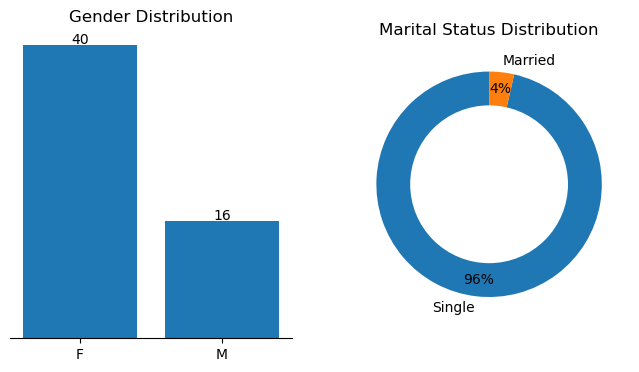

In [20]:
#plot a bar chart and pie chart of the Gender and Marital Status respectively
fig, ax = plt.subplots(1,2, figsize=[8,4])

ax[0].bar(x=df['Gender'].value_counts().index, height=df['Gender'].value_counts().values)
ax[1].pie(df['Marital Status'].value_counts().values, labels=df['Marital Status'].value_counts().index, startangle=90, 
          autopct="%.0f%%", pctdistance=0.85)

donut_hole = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)

#add title
ax[0].set_title('Gender Distribution')
ax[1].set_title('Marital Status Distribution')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)

#remove y-axis
ax[0].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df['Gender'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.7), ha='center', va='center')


plt.show()
          

- **40** students are female whereas only **16** are male
- **4%** of the student are married whereas 96% are single

#### Student Age Distribution

In [21]:
#Age distribution of the students
df['Student Age'].value_counts().sort_index(ascending=True)

Student Age
17     8
18    25
19     9
20     7
21     1
22     1
23     1
24     1
25     3
Name: count, dtype: int64

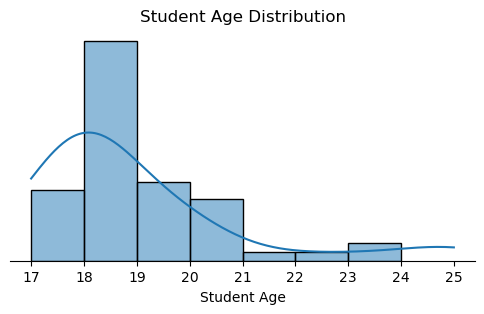

In [22]:
#plot a histogram of the student age 

#create a bin for plotting the histogram
bins = np.arange(df['Student Age'].min(), df['Student Age'].max(), 1)

fig, ax = plt.subplots(figsize=[6,3])

sns.histplot(data=df, x='Student Age', bins=bins, kde=True)

#add title
ax.set_title('Student Age Distribution')
ax.set_xlabel('Student Age')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)

#remove y-axis
ax.yaxis.set_visible(False)

    
plt.show()

- The Age distribution of the student is skewed to the left with majority of the student age lies between 17 - 21 years.
- The plot shows that majority of the student are 18 years of age as at the year they wrote the exam. 

#### Distribution of Courses Registered

In [23]:
#Check the unique courses registered
df['Course Registered'].value_counts()

Course Registered
Nursing                   29
Medicine                   6
Pharmacy                   5
Computer Science           4
Med Lab                    4
Radiography                2
Cyber Security             1
Med Rehabilitation         1
Industrial Chemistry       1
Civil Engineer             1
Mechanical Eng             1
Electrical Engineering     1
Name: count, dtype: int64

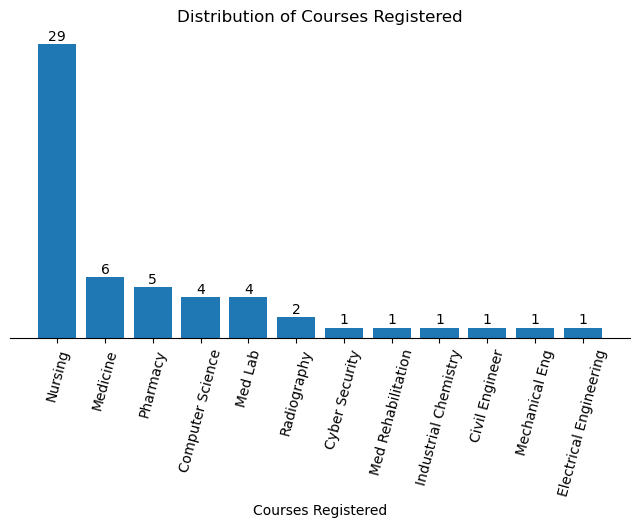

In [24]:
#plotting a bar chart of the distribution of the courses registered

fig, ax = plt.subplots(figsize=[8,4])
ax.bar(x=df['Course Registered'].value_counts().index, height=df['Course Registered'].value_counts().values)

#add title, label and remove yaxis
ax.set_title('Distribution of Courses Registered')
ax.set_xlabel('Courses Registered')
ax.yaxis.set_visible(False)

#rotate the x-ticks
ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Course Registered'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')

plt.show()

- With the demand for professional nurses, about 29 students which is 52% of the students applied to study Nursing.
- Medicine and Pharmacy ranked second and third with about 11% and 9% of the student who applied for them respectively

#### Distribution of Nursing by Gender

In [25]:
#Create a dataframe of students that applied for nursing and grouping by gender
nursing = df[df['Course Registered']=="Nursing"].groupby(['Gender'], as_index=False).agg(total_no=('Student Name', 'count'))
nursing

,Gender,total_no
0,F,25
1,M,4


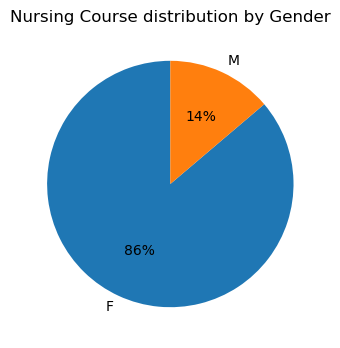

In [26]:
#plotting a pie-chart of the distribution of the nursing course by gender
fig, ax = plt.subplots(figsize=[5,4])

ax.pie(nursing['total_no'], labels=nursing['Gender'], autopct="%.0f%%", startangle=90)

ax.set_title('Nursing Course distribution by Gender')

plt.show()

- **86%** of the student that applied for nursing course are **female**, while **14%** are male

#### Distribution of University Registered

In [27]:
#to get the distribution of University registered
uni1 = df.groupby(['University Registered'], as_index=False).agg(total_no=('Student ID', 'count'))
uni1.sort_values('total_no', ascending=False)

,University Registered,total_no
6,Unizik,44
3,UNN,6
0,ANSU,1
1,Funai,1
2,IMSU,1
4,Unical,1
5,Uniport,1
7,college of nursing,1


In [28]:
#creating a new column 'university' for aggregating
uni_name =[]
for x in uni1['total_no']:
    if x == 1:
        uni_name.append('Others')
    elif x== 6:
        uni_name.append('UNN')
    elif x== 44:
        uni_name.append('Unizik')

uni1['University'] = uni_name

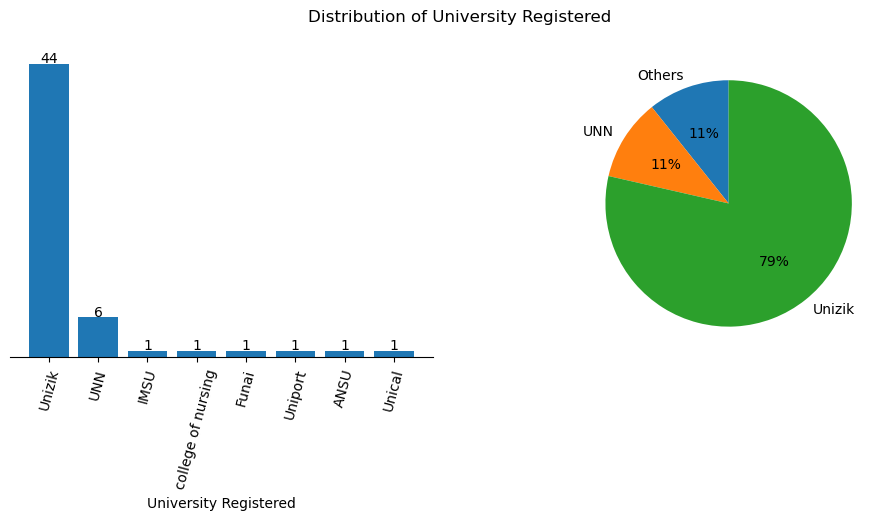

In [29]:
#plotting a barchart and piechart of the distribution of the university registered by the student

fig, ax = plt.subplots(1, 2, figsize=[12,4])
ax[0].bar(x=df['University Registered'].value_counts().index, height=df['University Registered'].value_counts().values)

#add title
fig.suptitle('Distribution of University Registered')
ax[0].set_xlabel('University Registered')
ax[0].yaxis.set_visible(False)

ax[0].xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['University Registered'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')


#create a dataframe for the second plot
uni2 = uni1.groupby(['University'], as_index=False).agg(total_no=('total_no', 'sum'))
ax[1].pie(uni2['total_no'], labels=uni2['University'], startangle=90, autopct='%.0f%%')

plt.show()

- **Nnamdi Azikiwe University (Unizik)** is the most popular choice for students in Anambra State with about **79%** of the choice
- **University of Nigeria Nsukka (UNN)** is the second popular choice with about **11%** of the choice

#### Timeline of student's registration at the academy

In [30]:
#group by month and week registered
reg = df.groupby(['Month Registered','Month Name','Week Registered'], as_index=False).agg(total_no=('Student ID', 'count'))
reg.head()

,Month Registered,Month Name,Week Registered,total_no
0,1,January,01,10
1,1,January,02,8
2,1,January,03,6
3,1,January,04,10
4,2,February,04,1


In [31]:
#create a new column which merges month and week
reg['Month-Week'] = reg['Month Name'].str[0:3]+' Wk-'+ reg['Week Registered']

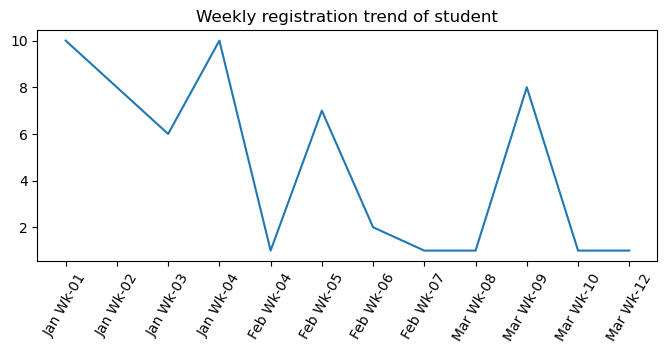

In [32]:
#plot a linechart of the timeline
fig, ax = plt.subplots(figsize=[8,3])
ax.plot(reg['Month-Week'], reg['total_no'])

#add title
ax.set_title('Weekly registration trend of student')
ax.xaxis.set_tick_params(rotation=60)


plt.show()

#### Monthly registration of Student

In [33]:
#Number of student enrolled by month
student_reg = df.groupby(['Month Registered', 'Month Name'], as_index=False).agg(student_reg=('Student Name', 'count')).sort_values('Month Registered', 
                                                                                                                                    ascending=True)
student_reg

,Month Registered,Month Name,student_reg
0,1,January,34
1,2,February,11
2,3,March,11


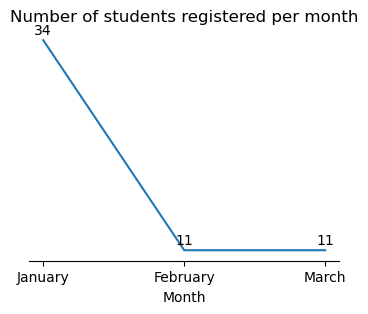

In [34]:
#Plotting a line chart of monthly registration of student
fig, ax = plt.subplots(figsize=[4,3])

ax.plot(student_reg['Month Name'] ,student_reg['student_reg'])

#add title and label
ax.set_title('Number of students registered per month')
ax.set_xlabel('Month')

#remove spines
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(student_reg['student_reg']):
    ax.annotate(values, xy=(index, values+1.1), ha='center', va='center')

plt.show()

#### Distribution of the Student by Work Status

In [35]:
#distribution of the students by work status
df['Work Status'].value_counts()

Work Status
No     46
Yes    10
Name: count, dtype: int64

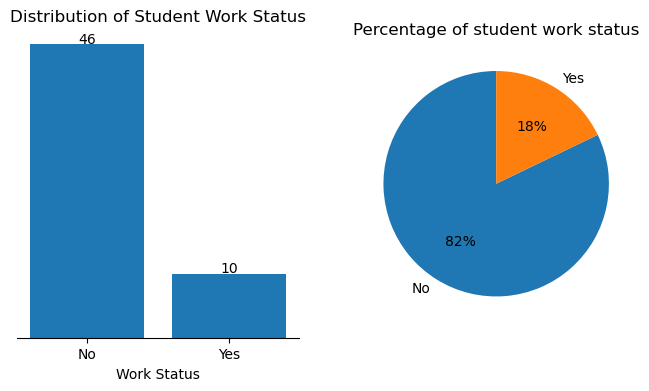

In [36]:
#plotting a barchart and pie-chart of the distribution of the work status of the students

fig, ax = plt.subplots(1, 2, figsize=[8,4])
ax[0].bar(x=df['Work Status'].value_counts().index, height=df['Work Status'].value_counts().values)

#add title
ax[0].set_title('Distribution of Student Work Status')
ax[0].set_xlabel('Work Status')
ax[0].yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Work Status'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')

#plot 2
ax[1].pie(df['Work Status'].value_counts().values, labels=df['Work Status'].value_counts().index, autopct="%.0f%%", startangle=90)

ax[1].set_title('Percentage of student work status')

plt.show()

- About **18%** of the students **work** and attend lesson while **82%** do not work

#### Distribution of Hours Read by the students

In [37]:
#distribution of number of hours the student read per day
df['Hours Read'].value_counts().sort_index(ascending=True)

Hours Read
2     11
3     29
4     11
5      3
7      1
10     1
Name: count, dtype: int64

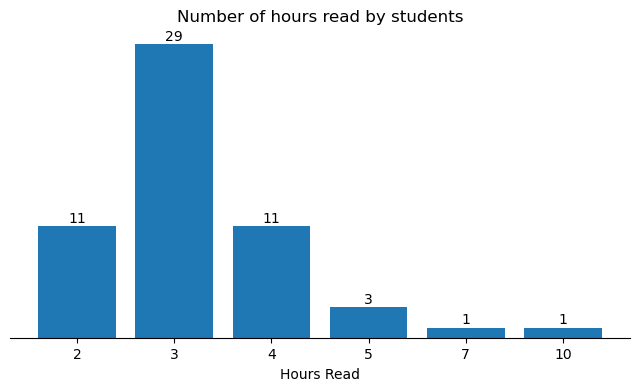

In [38]:
#plot a bar chart of number of hours read

fig, ax = plt.subplots(figsize=[8,4])
hr_read = df.groupby(['Hours Read'], as_index=False).agg(total_hours=('Student Name', 'count'))

#casting hours read as string
hr_read['Hours Read']=hr_read['Hours Read'].astype('str')

ax.bar(x=hr_read['Hours Read'], height=hr_read['total_hours'])

#add title
ax.set_title('Number of hours read by students')
ax.set_xlabel('Hours Read')
ax.yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(hr_read['total_hours']):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')

plt.show()

- Majority of the student read between 2 to 4 hours each day with about **52%** of students reading **3 hours** each day

#### Distribution of Satisfaction level of Students with the tutoring

In [39]:
#checking the teaching satifaction level
df['Teaching Satisfaction'].value_counts()

Teaching Satisfaction
5    38
4    17
3     1
Name: count, dtype: int64

In [40]:
# Creating a descriptive column for satisfaction level of student using 5:Very Satisfied, 4: Satisfied, 3: Neutral, 2: Dissatisfied, 1:Very Disatisfied

sat = []
for x in df['Teaching Satisfaction']:
    if x == 1:
        sat.append('Very Dissatisfied')
    elif x == 2:
        sat.append('Dissatisfied')
    elif x == 3:
        sat.append('Neutral')
    elif x == 4:
        sat.append('Satisfied')
    elif x == 5:
        sat.append('Very Satisfied')

df['Satisfaction'] = sat

In [41]:
#confirming the satifaction column has been created
df['Satisfaction'].value_counts()

Satisfaction
Very Satisfied    38
Satisfied         17
Neutral            1
Name: count, dtype: int64

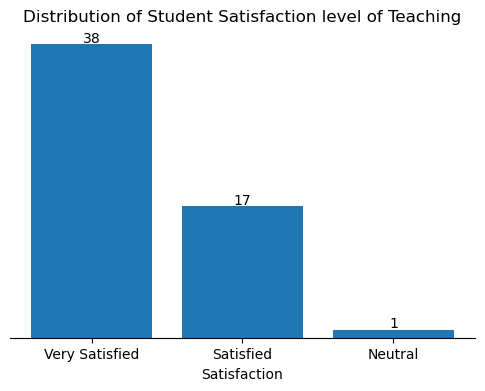

In [42]:
#plot a bar chart of Student satisfaction

fig, ax = plt.subplots(figsize=[6,4])

ax.bar(x=df['Satisfaction'].value_counts().index, height=df['Satisfaction'].value_counts().values)

#add title
ax.set_title('Distribution of Student Satisfaction level of Teaching')
ax.set_xlabel('Satisfaction')
ax.yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Satisfaction'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')


plt.show()

- About **67.9%** of the students were very satisfied with the teaching that was delivered while **30.4%** were satisfied

#### Distribution of Number of times the student have written the exam

In [43]:
#create a column for students who write twice

#this code create a list of the values in the score 2023 column
pp = []
for i, row in df.loc[:, ['Score 2023']].iterrows():
    pp.append(row[-1])

#this code loop through the list to check if the value is greater than zero, if yes, then the student wrote exam in 2023
wrote_twice = []
for t in pp:
    if t > 0:
        wrote_twice.append('Yes')
    else: 
        wrote_twice.append('No')

df['Wrote Twice'] = wrote_twice

In [44]:
#number of students that wrote twice
df['Wrote Twice'].value_counts()

Wrote Twice
Yes    32
No     24
Name: count, dtype: int64

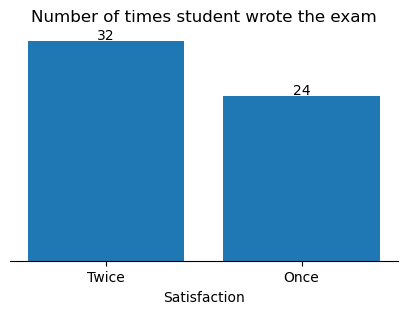

In [45]:
#plot a bar chart of number of times student wrote the exam

fig, ax = plt.subplots(figsize=[5,3])

ax.bar(x=df['Wrote Twice'].value_counts().index, height=df['Wrote Twice'].value_counts().values)

#add title
ax.set_title('Number of times student wrote the exam')
ax.set_xlabel('Satisfaction')
ax.yaxis.set_visible(False)
ax.set_xticklabels(['Twice', 'Once'])
#ax.xaxis.set_tick_params(rotation=75)

ax.spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Wrote Twice'].value_counts()):
    ax.annotate(values, xy=(index, values+0.8), ha='center', va='center')


plt.show()

- **57%** of the students have written the exam in the previous year 2023

#### Distribution of Student who **Finished on time** & whose **Computer off**

In [46]:
#checking the number who finished on time
df['Finished on time'].value_counts()

Finished on time
Yes    44
No     11
yes     1
Name: count, dtype: int64

- This shows that there is inconsistency in the values

In [47]:
#replacing yes with Yes
df['Finished on time'] = df['Finished on time'].str.replace('yes', 'Yes')

In [48]:
#checking if the value have been replaced
df['Finished on time'].value_counts()

Finished on time
Yes    45
No     11
Name: count, dtype: int64

- **45 students** finished on time while **11** didn't finish on time

In [49]:
#checking the distribution of students whose computer went off
df['Computer Off'].value_counts()

Computer Off
No     46
yes     8
no      2
Name: count, dtype: int64

In [50]:
#inconsistency in the values, replace no with No
df['Computer Off'] = df['Computer Off'].str.replace('no', 'No')

In [51]:
#checking if the values have been replaced
df['Computer Off'].value_counts()

Computer Off
No     48
yes     8
Name: count, dtype: int64

- **8 students** indicated that their computer went off during the exam

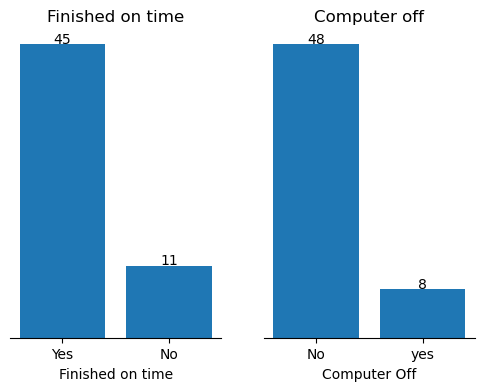

In [52]:
#plot a bar chart of finished on time and computer off

fig, ax = plt.subplots(1, 2, figsize=[6,4])

ax[0].bar(x=df['Finished on time'].value_counts().index, height=df['Finished on time'].value_counts().values)
ax[1].bar(x=df['Computer Off'].value_counts().index, height=df['Computer Off'].value_counts().values)

#add title
ax[0].set_title('Finished on time')
ax[0].set_xlabel('Finished on time')
ax[0].yaxis.set_visible(False)

#add title
ax[1].set_title('Computer off')
ax[1].set_xlabel('Computer Off')
ax[1].yaxis.set_visible(False)

#ax.xaxis.set_tick_params(rotation=75)

ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[1].spines[['top', 'left', 'right']].set_visible(False)

for index, values in enumerate(df['Finished on time'].value_counts()):
    ax[0].annotate(values, xy=(index, values+0.8), ha='center', va='center')
for index, values in enumerate(df['Computer Off'].value_counts()):
    ax[1].annotate(values, xy=(index, values+0.8), ha='center', va='center')


plt.show()

- **45 students** finished on time while **11** student didn't
- **8 students** indicated that their computer went off during the exam

#### Distribution of Student who payed for the lesson by themselves

In [53]:
#student who payed themselves
df['Pay Yourself'].value_counts()

Pay Yourself
no     39
Yes    16
yes     1
Name: count, dtype: int64

In [54]:
#replace yes with Yes
df['Pay Yourself'] = df['Pay Yourself'].str.replace('yes', 'Yes')

In [55]:
df['Pay Yourself'].value_counts()

Pay Yourself
no     39
Yes    17
Name: count, dtype: int64

In [56]:
#student who lived close or far
df['Close Proximity to center'].value_counts()

Close Proximity to center
yes    33
No     23
Name: count, dtype: int64

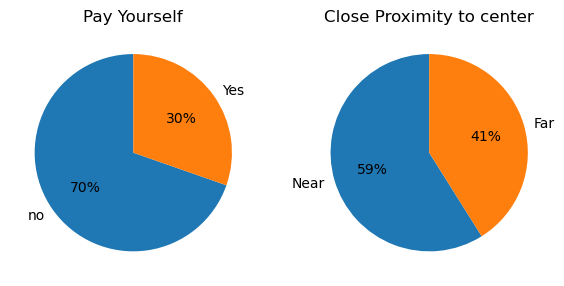

In [57]:
#plot a pie-chart
fig, ax = plt.subplots(1, 2, figsize=[7,4])
ax[0].pie(df['Pay Yourself'].value_counts().values, labels=df['Pay Yourself'].value_counts().index, autopct="%.0f%%", startangle=90)
ax[1].pie(df['Close Proximity to center'].value_counts().values, labels=['Near', 'Far'], 
          autopct="%.0f%%", startangle=90)

#add title
ax[0].set_title('Pay Yourself')
ax[1].set_title('Close Proximity to center')

plt.show()

- **30%** of the student payed for the lesson by themselves
- **41%** of the students lived far from the center and takes a transport to come for lesson

### Distribution of the 2024 score

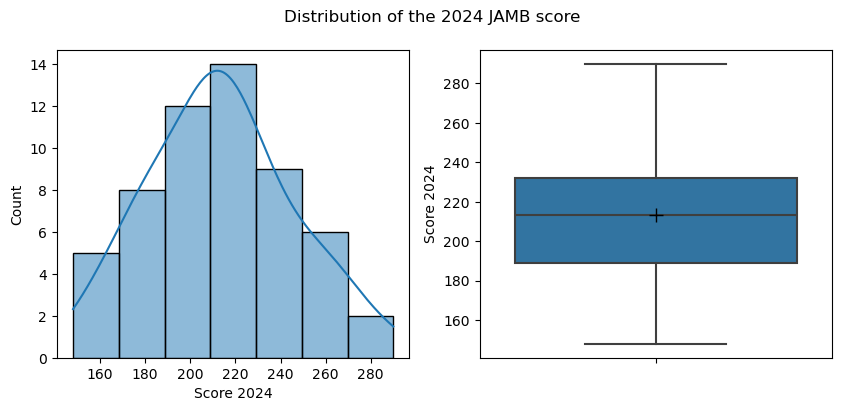

In [59]:
#plot a box plot of the scores
fig, ax = plt.subplots(1, 2, figsize=[10,4])

sns.histplot(data=df, x='Score 2024', ax=ax[0], kde=True)
sns.boxplot(data=df, y='Score 2024', showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, ax=ax[1])

fig.suptitle('Distribution of the 2024 JAMB score')

plt.show()

- The histogram shows that JAMB score in 2024 is normally distributed with mean and median at 213. This implies the 50% of the students scored above 213
- The boxplot also showed that the top 25% scored above 230 in the exam

## Data Analysis

### Question 1: What is the highest and lowest score in 2024 JAMB

In [60]:
#Find the highest score
highest_score = df['Score 2024'].max()
highest_score

290

In [61]:
#Find the lowest score
lowest_score = df['Score 2024'].min()
lowest_score

148

### Question 2: What are the top five scores and least five scores

#### Top 5 Scores

In [62]:
#top five scores
top_5_score = df[['Student ID' ,'Score 2024']].sort_values('Score 2024', ascending=False).head(5)
top_5_score

,Student ID,Score 2024
8,UB2024009,290
15,UB2024016,278
25,UB2024026,269
38,UB2024039,264
36,UB2024037,263


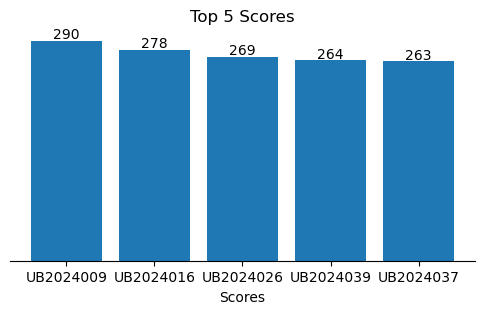

In [63]:
#plot a bar chart of the top 5 scores
fig, ax = plt.subplots(figsize=[6,3])

ax.bar(x=top_5_score['Student ID'], height=top_5_score['Score 2024'])

#add title and labels
ax.set_title('Top 5 Scores')
ax.set_xlabel('Scores')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(top_5_score['Score 2024']):
    ax.annotate(values, xy=(index, values+8), ha='center', va='center')
plt.show()

#### Least 5 Scores

In [64]:
#least 5 scores
least_5_scores = df[['Student ID', 'Score 2024']].sort_values('Score 2024', ascending=False).tail(5)
least_5_scores

,Student ID,Score 2024
19,UB2024020,168
35,UB2024036,162
30,UB2024031,161
41,UB2024042,159
45,UB2024046,148


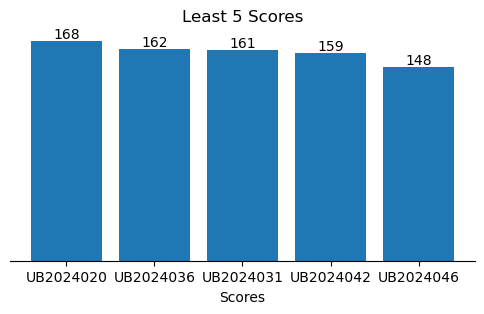

In [65]:
#plot a bar chart of the least 5 scores
fig, ax = plt.subplots(figsize=[6,3])

ax.bar(x=least_5_scores['Student ID'], height=least_5_scores['Score 2024'])

#add title and labels
ax.set_title('Least 5 Scores')
ax.set_xlabel('Scores')

#remove spines
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(least_5_scores['Score 2024']):
    ax.annotate(values, xy=(index, values+5), ha='center', va='center')
plt.show()

### Question 3: What percentage scored below 200, 200-249 and 250-299

##### Create a range for below 200, 200-249, 250-299, 300 above

In [66]:
#create a list of score range
score_range = []
for x in df['Score 2024']:
    if x < 200:
        score_range.append('Below 200')
    elif x < 250:
        score_range.append('200 - 249')
    elif x < 300:
        score_range.append('250 - 299')
    elif x > 300:
        score_range.append('Above 300')

#create a column score range
df['Score Range'] = score_range

In [67]:
#group by score range
score_category = df.groupby(['Score Range'], as_index=False).agg(total_no = ('Student Name', 'count'))
score_category

,Score Range,total_no
0,200 - 249,31
1,250 - 299,8
2,Below 200,17


In [68]:
#create the percentage of score category
score_category['perc'] = ((score_category['total_no']/score_category['total_no'].sum())*100).round(0)
score_category

,Score Range,total_no,perc
0,200 - 249,31,55.0
1,250 - 299,8,14.0
2,Below 200,17,30.0


In [69]:
#indexing the category
cat_index = []
for x in score_category['Score Range']:
    if x == 'Below 200':
        cat_index.append(1)
    elif x == '200 - 249':
        cat_index.append(2)
    elif x == '250 - 299':
        cat_index.append(3)
score_category['index'] = cat_index
score_category

,Score Range,total_no,perc,index
0,200 - 249,31,55.0,2
1,250 - 299,8,14.0,3
2,Below 200,17,30.0,1


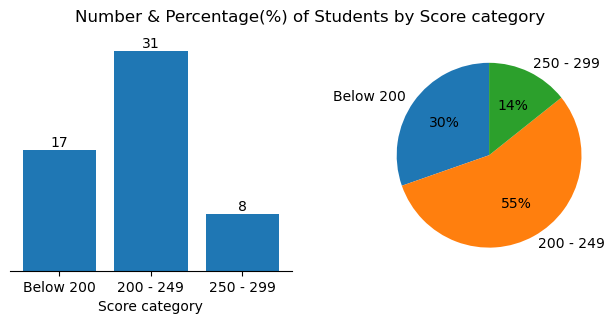

In [70]:
#plot a bar chart of the least 5 scores
fig, ax = plt.subplots(1, 2, figsize=[8,3])

#sort the dataframe
score_category_sorted = score_category.sort_values('index', ascending=True)
ax[0].bar(x=score_category_sorted['Score Range'], height=score_category_sorted['total_no'])

#add title and labels
fig.suptitle('Number & Percentage(%) of Students by Score category')
ax[0].set_xlabel('Score category')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[0].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(score_category_sorted['total_no']):
    ax[0].annotate(values, xy=(index, values+1), ha='center', va='center')

#second plot
ax[1].pie(score_category_sorted['total_no'], labels=score_category_sorted['Score Range'], autopct="%.0f%%", startangle=90)
plt.show()

- The chart shows that **14%** of the students score between **250-299**
- **55%** scored between **200-249** and **30%** scored below 200

### Question 4: What is the total revenue generated by month?

#### Total Revenue

In [71]:
#determine the total revenue generated
total_revenue = df['Total Lesson Fee'].sum()
total_revenue

1699000

#### Total Revenue in January

In [72]:
#filter student who registered in January
jan_reg = df[df['Date Registered']<= '2024-01-31']

In [73]:
r_jan = jan_reg.groupby(['Month Name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_jan

,Month Name,Student_Reg,Total_Revenue
0,January,34,444000


#### Total Revenue in February

In [74]:
#filter student who registered between january and feb
feb_reg = df[df['Date Registered']<= '2024-02-29']

In [75]:
#create a column with the same month name 'February
list1 = []
for x in feb_reg['Student Name']:
    list1.append('February')
feb_reg['Month_name'] = list1

In [76]:
#group by the month
r_feb = feb_reg.groupby(['Month_name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_feb

,Month_name,Student_Reg,Total_Revenue
0,February,45,567000


#### Total Revenue in March

In [77]:
#filter student who registered between january and march
mar_reg = df[df['Date Registered']<= '2024-03-31']

In [78]:
#create a column with the same month name 'February
list2 = []
for x in mar_reg['Student Name']:
    list2.append('March')
mar_reg['Month_name'] = list2

In [79]:
#group by month
r_mar = mar_reg.groupby(['Month_name'], as_index=False).agg(Student_Reg=('Student Name', 'count'), Total_Revenue=('Lesson Fee', 'sum'))
r_mar

,Month_name,Student_Reg,Total_Revenue
0,March,56,688000


In [80]:
#rename columns to match those in january reg
r_feb.rename(columns={
    'Month_name': 'Month Name'
}, inplace=True
            )

r_mar.rename(columns={
    'Month_name': 'Month Name'
}, inplace=True
            )

In [81]:
#concact the three dataframe
rev_concact = pd.concat([r_jan, r_feb, r_mar])
rev_concact

,Month Name,Student_Reg,Total_Revenue
0,January,34,444000
0,February,45,567000
0,March,56,688000


In [82]:
#reset index and drop the index column
rev_concact.reset_index().drop('index', axis=1, inplace=True)

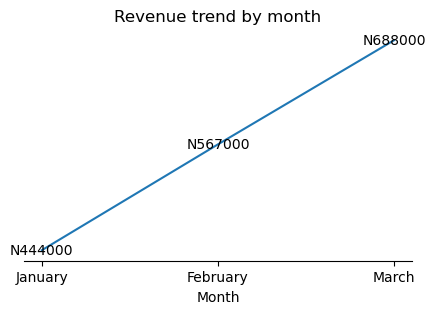

In [83]:
#plot a line chart of the revenue trend

fig, ax = plt.subplots(figsize=[5,3])
ax.plot(rev_concact['Month Name'], rev_concact['Total_Revenue'])

#add title
ax.set_title('Revenue trend by month')
ax.set_xlabel('Month')

ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(rev_concact['Total_Revenue']):
    ax.annotate('N'+ str(values), xy=(index, values), ha='center', va='center')
plt.show()

### Question 5: What is the performance of student in 2024 compared to 2023?

#### Determining the number of students who had written both in 2023 and 2024

In [84]:
df['Wrote Twice'].value_counts()

Wrote Twice
Yes    32
No     24
Name: count, dtype: int64

- Out of 56 registered students, 34 students had written the exam previously in 2023 and also written in 2024

In [85]:
#create a dataframe of students who took exam in 2023 and 2024

wrote_twice = df[df['Score 2023'].notnull()]

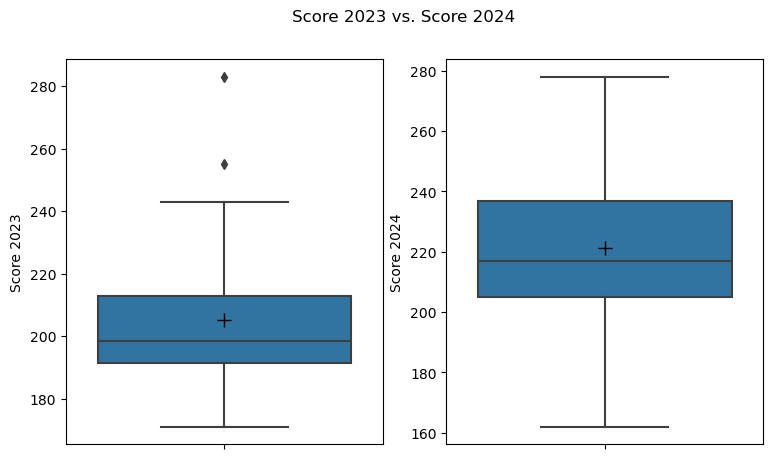

In [87]:
#plot a box plot of the scores in 2023 and 2024
fig, ax = plt.subplots(1, 2, figsize=[9,5])

sns.boxplot(data=wrote_twice, y='Score 2023', ax=ax[0], 
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
sns.boxplot(data=wrote_twice, y='Score 2024', ax=ax[1],
           showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

fig.suptitle('Score 2023 vs. Score 2024')

plt.show()

- The mean score in 2023 is at **205** whereas in 2024 is at **221**
- More than **80%** of the student scored above 200 mark compared to 2023 where less than **50%** scored above 200

### Question 6: Did the student performance in 2024 better than 2023 performance?

In [88]:
#import the statistics
from scipy import stats

In [89]:
#create the pre score and post score variables
score_2023 = wrote_twice['Score 2023']
score_2024 = wrote_twice['Score 2024']

#### State the Null and Alternative Hypothesis 
- H0: There is no difference between the mean score of 2023 and 2024 JAMB exam
- H1: There is statistically significant difference between the mean scores of 2023 and 2024 JAMB exam

In [90]:
#getting the difference between the scores
score_difference = score_2024 - score_2023

In [91]:
#finding the mean of the score difference
score_difference.mean()

15.84375

- The mean of the score difference is **15.84375**, which is far away from zero(0)

#### Performing a paired sample t-test with two-tailed

In [92]:
#performing the paired sample t-test with two-tailed
stats.ttest_rel(score_2023, score_2024)

TtestResult(statistic=-3.400866592047638, pvalue=0.0018669106101036385, df=31)

- The **p value(0.00187)** is less than the alpha **(0.05)** significance level; we reject the null hypothesis.
- Therefore, at **5%** significance level, the data provide strong evidence to conclude that there is **statisfically significance difference** between the mean of 2023 and 2024

#### Performing a paired sample t-test with left-tailed

In [93]:
#performing the paired sample t-test in one direction
stats.ttest_rel(score_2023, score_2024, alternative='less')

TtestResult(statistic=-3.400866592047638, pvalue=0.0009334553050518192, df=31)

- The **p value (0.00093)** is less than alpha **0.05** significance level. This implies that there is strong evidence in the data that the 2024 mean is statistically greater than 2023 mean.
- Therefore, at 5% significance level, the data provide strong evidence to conclude that the students JAMB score improved after months of tutoring and 2024 performance is better than 2023.

### Question 7: Did the Female students perform better than Male in 2024 JAMB?

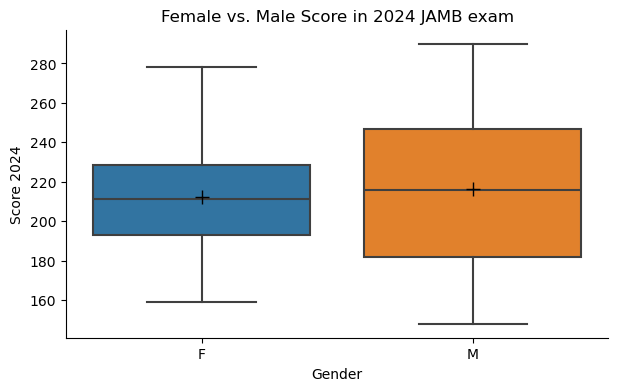

In [94]:
# plotting a barplot and boxplot of the 2024 JAMB score of the male and female

fig, ax = plt.subplots(figsize=[7,4])

sns.boxplot(data=df, x='Gender', y='Score 2024', showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

#add title
ax.set_title('Female vs. Male Score in 2024 JAMB exam')
ax.spines[['top','right']].set_visible(False)

plt.show()

In [95]:
#grouping by gender and calculating the mean score and standard deviation
df.groupby(['Gender']).agg(median=('Score 2024', 'median'), mean=('Score 2024', 'mean'), std=('Score 2024', 'std'), )

,median,mean,std
Gender,,,
F,211.5,212.1000,28.444097
M,216.0,216.3125,39.850920


In [96]:
#getting the inter-quartile range for the female score
stats.iqr(df[df['Gender']=='F']['Score 2024'])

35.75

In [97]:
#getting the inter-quartile range for the male score
stats.iqr(df[df['Gender']=='M']['Score 2024'])

64.5

- The Female have a **mean score** of **212.1** and a standard deviation of **28.44** while the male have a mean score of **216.3** which is higher by 4 and a high standard deviation of **39.85**
- The difference in the mean score is a small but in terms of standard deviation, the standard deviation of the male scores show that their scores are spread out from the mean and that the mean scoreof male students maybe influenced by outliers
- The Inter-quartile range **(IQR)** of the female is **35.75** while that of the male is **64.5** showing that the middle 50% of the male score are spread out widely apart
- Therefore, the female students perform better in the JAMB than the male students

### Question 8: Did the student living CLOSE perform better than those living FAR?

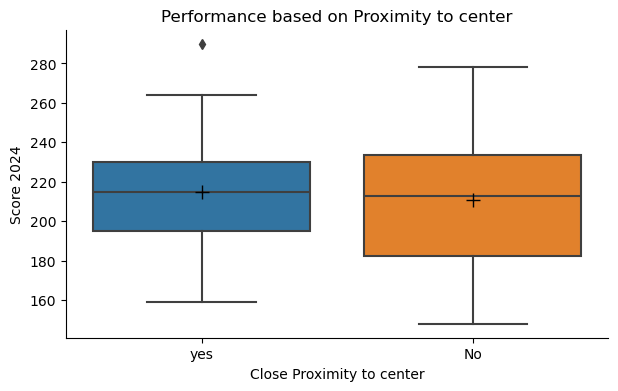

In [98]:
# plotting a barplot of the 2024 JAMB score of student who live close and Far

fig, ax = plt.subplots(figsize=[7,4])

sns.boxplot(data=df, x='Close Proximity to center', y='Score 2024', showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

#add title
ax.set_title('Performance based on Proximity to center')
ax.spines[['top','right']].set_visible(False)

plt.show()

In [99]:
#getting the median, mean and standard deviation of the students based on proximity
df.groupby(['Close Proximity to center']).agg(median=('Score 2024', 'median'), mean=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,median,mean,std
Close Proximity to center,,,
No,213.0,210.956522,33.188824
yes,215.0,214.939394,31.189882


In [100]:
#getting the inter-quartile range for students living close
stats.iqr(df[df['Close Proximity to center']=='yes']['Score 2024'])

35.0

In [101]:
#getting the inter-quartile range for students living close
stats.iqr(df[df['Close Proximity to center']=='No']['Score 2024'])

51.0

- Those who live closer to the center had higher mean score and low standard deviation, and the **IQR** of **35** suggest less variability in the middle 50%
- This implies that students that live closer perform better in the Exam

### Question 9: What is the performance of Student based on their WORK STATUS?

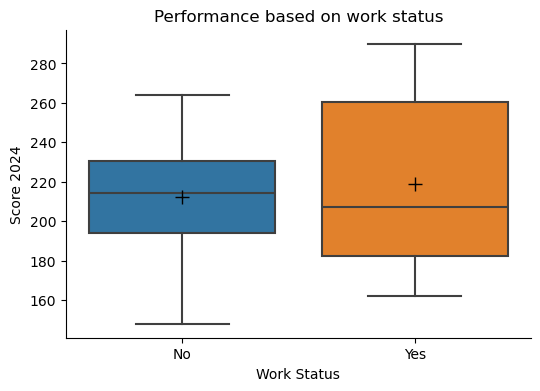

In [102]:
# plotting a barplot of the 2024 JAMB score of student who live close and Far

fig, ax = plt.subplots(figsize=[6,4])

sns.boxplot(data=df, x='Work Status', y='Score 2024', showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

#add title
ax.set_title('Performance based on work status')
ax.spines[['top','right']].set_visible(False)

plt.show()

In [103]:
#getting the median, mean and standard deviation of the students based on work status
df.groupby(['Work Status']).agg(median=('Score 2024', 'median'), mean=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,median,mean,std
Work Status,,,
No,214.5,212.086957,28.225147
Yes,207.0,218.900000,46.364378


In [104]:
#getting the inter-quartile range for students based on work status
stats.iqr(df[df['Work Status']=='No']['Score 2024'])

36.5

In [105]:
#getting the inter-quartile range for students based on work status
stats.iqr(df[df['Work Status']=='Yes']['Score 2024'])

78.25

- On Average, student that work had a better score but the standard deviation is higher which implies the scores are spread out from the mean
- The students that did not work had a mean score that is 6 less but had a lower standard deviation, implying that the scores are less spread out from the mean
- The IQR of students that do not work is 36.5 compared to 78.25 for those that work, which implies a higher variability in the middle 50% of the students who work.
- This shows that the students who did not work performed better in the JAMB Exam

### Question 10: What is the performance of the students based on duration of tutoring?

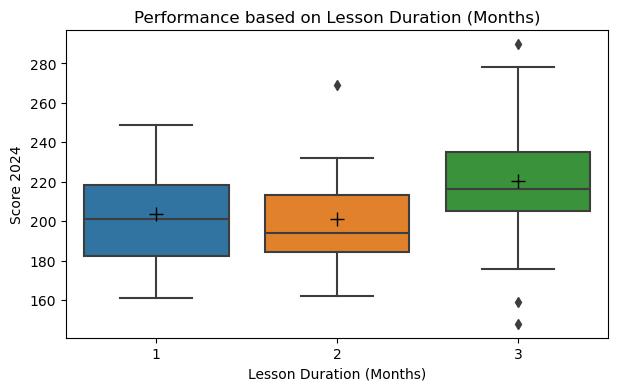

In [106]:
# plotting a barplot of the 2024 JAMB score of student who live close and Far

fig, ax = plt.subplots(figsize=[7,4])
les_dur=df['Lesson Duration (Months)'].astype('str')
sns.boxplot(data=df, x='Lesson Duration (Months)',y='Score 2024', showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

#add title
ax.set_title('Performance based on Lesson Duration (Months)')
#ax.spines[['top','right']].set_visible(False)

plt.show()

In [107]:
#getting the median, mean and standard deviation of the students based on Lesson duratio
df.groupby(['Lesson Duration (Months)']).agg(median=('Score 2024', 'median'), mean=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,median,mean,std
Lesson Duration (Months),,,
1,201.0,203.636364,27.641537
2,194.0,201.090909,30.513782
3,216.5,220.382353,32.218021


In [108]:
#getting the inter-quartile range for students based on Lesson duration
stats.iqr(df[df['Lesson Duration (Months)']==1]['Score 2024'])

36.0

In [109]:
#getting the inter-quartile range for students based on Lesson duration
stats.iqr(df[df['Lesson Duration (Months)']==2]['Score 2024'])

29.0

In [110]:
#getting the inter-quartile range for students based on Lesson duration
stats.iqr(df[df['Lesson Duration (Months)']==3]['Score 2024'])

29.75

- The median score and mean score of students who had 3 months of tutoring are high compared to those that 2 months and 1 month of training
- The **IQR** of the the students who had 3 months of training is almost equal to those who had two(2) of tutoring
- This statistics shows that the student who had three months of training perform better that two months and these two months had better performance than one month

### Question 11: What is the performance of the students based on Hours Read?

In [111]:
#create hour read group 2hr, 3hr, 4hr, >=5hrs
range_hr = []
for x in df['Hours Read']:
    if x == 2:
        range_hr.append('2 hrs')
    elif x == 3:
        range_hr.append('3 hrs')
    elif x == 4:
        range_hr.append('4 hrs')
    elif x >= 5:
        range_hr.append('5 hrs & above')
df['Hours Read Range'] = range_hr

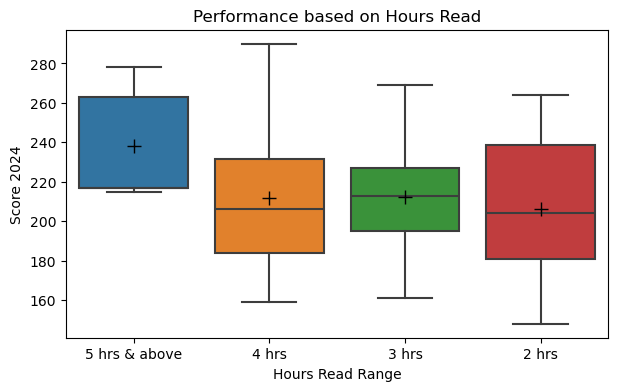

In [112]:
# plotting a boxplot of the 2024 JAMB score of student based on hours read

fig, ax = plt.subplots(figsize=[7,4])

sns.boxplot(data=df, x='Hours Read Range', y='Score 2024', showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

#add title
ax.set_title('Performance based on Hours Read')
#ax.spines[['top','right']].set_visible(False)

plt.show()

In [113]:
#getting the median, mean and standard deviation of the students based on Lesson duratio
df.groupby(['Hours Read Range']).agg(median=('Score 2024', 'median'), mean=('Score 2024', 'mean'), std=('Score 2024', 'std'))

,median,mean,std
Hours Read Range,,,
2 hrs,204.0,206.272727,36.005808
3 hrs,213.0,212.344828,26.529331
4 hrs,206.0,211.636364,39.522836
5 hrs & above,217.0,238.000000,30.149627


In [114]:
#getting the inter-quartile range for students based on hours reads
iqr_2hrs = stats.iqr(df[df['Hours Read Range']=='2 hrs']['Score 2024'])
iqr_3hrs = stats.iqr(df[df['Hours Read Range']=='3 hrs']['Score 2024'])
iqr_4hrs = stats.iqr(df[df['Hours Read Range']=='4 hrs']['Score 2024'])
iqr_5hrs = stats.iqr(df[df['Hours Read Range']=='5 hrs & above']['Score 2024'])

In [115]:
print('iqr 2_hrs =', iqr_2hrs)
print('iqr 3_hrs =', iqr_3hrs)
print('iqr 4_hrs =', iqr_4hrs)
print('iqr 5_hrs & above =', iqr_5hrs)

iqr 2_hrs = 57.5
iqr 3_hrs = 32.0
iqr 4_hrs = 47.5
iqr 5_hrs & above = 46.0


- Analysis of the amount of time, the student spent reading each day revealed that students who invested three hours reading every day in preparation for the exam did better, with a mean score of 212.34, a low standard deviation of 26.52.
- An IQR of 32 indicated a reduced variability in the middle 50% of the data.

## Summary

### Demographic Insight
The analysis of the performance of students of Ultra-Brain Science Academy in the 2024 exam revealed the following insights
- The Academy had 56 students in total
- **71%** are females whereas **29%** are males
- The Age distribution of the student is skewed to the left with large number of the student age lies between 17 - 20 years.18 years being the most common
- A total of **32(57%) students** had previously sat the exam in the year 2023.
- **52%** of the students applied for Nursing out of which **86%** of them are female
- **79%** of them choose Nnamdi Azikiwe University (Unizik) as their first choice
- **18%** of the students worked and attended classes
- **41%** resided far away from the academy.
- About **68%** of the students were **very satisfied** with the teaching that was delivered while **30%** were **satisfied**
- Majority of the student read between 2 to 4 hours each day with about **52%** of students reading **3** hours per day
- **80%** of the students finished on time
- **14%** of the students indicated that their computer went of during the exam

### Analysis Insight
- The 2024 students' JAMB scores had the same mean and median of 213 with a standard deviation of 31.79.
- The highest and lowest scores are 290 and 146, respectively.
- Analysis showed that 14% of the students scored above 250, 55% scored between 200 and 249, and 30% scored less than 200.

- Comparison analysis of 2023 scores and 2024 scores showed that more over 80% of students scored above 200 in 2024 JAMB, whereas in the previous year 2023, less than 50% passed the 200 mark.

- A paired sample t-test analysis on students' performance gave a p-value (0.00093) less than the 0.05 significance level, thus, we reject the null hypothesis that the mean in 2023 and 2024 are the same. Therefore, at the 5% significance level, the data provide strong evidence to suggest that the students' JAMB score increased after months of tutoring and that the students performed better in 2024.

- The performance of male students compared to that of female students gave the mean score (216.3 vs. 212.1) which showed that male had a higher mean score, but the standard deviation (39.85 vs. 28.44) showed male scores were more spread out from the mean. The interquartile range value (64.5 vs. 35.75) confirms the variability in male scores. This demonstrated that female students did better than male students on the exam.

- An examination of the impact of tutoring time on performance revealed that students who received three months of tutoring had a mean score of 220.38 and a standard deviation of 32.21, which is higher than those who had two months (201.09) or one month (203.38). This suggests that the longer the tutoring period, the better the students’ exam results.

- Analysis of the amount of time, the student spent reading each day revealed that students who invested three hours reading every day in preparation for the exam did better, with a mean score of 212.34, a low standard deviation of 26.52, and an IQR of 32 that indicated reduced variability in the middle 50% of the data


### Limitation and Recommendation

Analysis of features that may have impacted the performance of the students is required but the sample size is small and machine learning algorithm requires a large sample size to learn and predict the students performance. 

Therefore, further analysis is recommended with large dataset.